<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/Time_Series_Dummy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
 x = np.linspace(0,50,501)

In [36]:
y = np.sin(x)

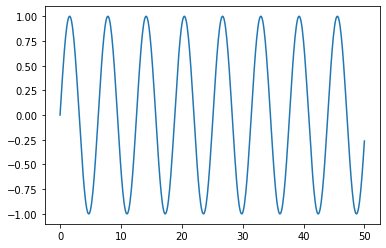

In [37]:
plt.plot(x,y)

In [38]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [39]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [40]:
len(df)

501

In [41]:
test_percent = 0.1

In [42]:
len(df)*test_percent

50.1

In [43]:
test_point = np.round(len(df)*test_percent)

In [44]:
test_point

50.0

In [45]:
test_ind = int(len(df)-test_point)

In [46]:
test_ind

451

In [47]:
train = df.iloc[:test_ind]

In [48]:
test = df.iloc[test_ind:]

In [49]:
test.shape

(50, 1)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaler.fit(train)

MinMaxScaler()

In [53]:
scaled_train = scaler.transform(train)

In [54]:
scaled_test = scaler.transform(test)

In [55]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [56]:
length = 2
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length, batch_size=batch_size)

In [57]:
len(scaled_train), len(generator)

(451, 449)

In [58]:
X,y = generator[0]

In [59]:
X

array([[[0.49999912],
        [0.54991622]]])

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, SimpleRNN

In [61]:
length=50
n_features = 1

In [62]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit_generator(generator,epochs=4)

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


449/449 [==============================] - 2s 3ms/step - loss: 0.0084
Epoch 2/4
449/449 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 3/4
449/449 [==============================] - 1s 3ms/step - loss: 0.0022
Epoch 4/4
449/449 [==============================] - 1s 3ms/step - loss: 0.0014


In [65]:
losses = pd.DataFrame(model.history.history)

In [66]:
losses

,loss
0,0.008381
1,0.002736
2,0.002214
3,0.001363


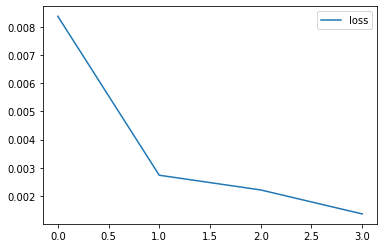

In [67]:
losses.plot()